# Plotting libraries
There are plenty of plotting libraries that can be used in python.

[Here is an article](https://opensource.com/article/20/4/plot-data-python) that compares some of the most common.

The most used is probably [**matplotlib**](https://matplotlib.org/), which is also what *pandas* uses as the default backend to plot.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
# some example data to plot
x = np.linspace(0, 2 * np.pi, 200)
y = np.sin(x ** 2)

When using a pandas `plot` method, a `matplotlib.Axes` is returned.
you can than use it to further edit it, embed it somewhere else or use it to access the underlying `matplotlib.Figure` and save it to file.

A `Figure` can contain multiple `Axes` which are the area where data will be plotted.

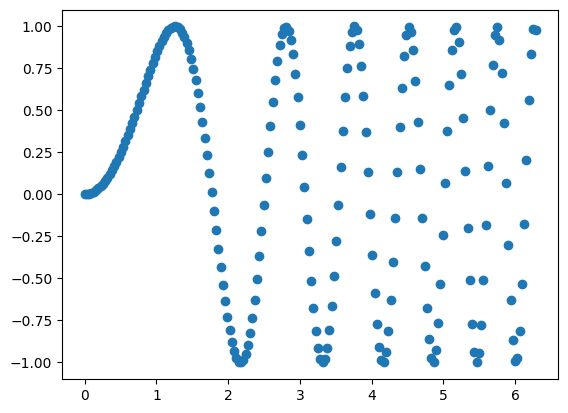

In [17]:
# when using "pure" matplotlib

fig, ax1 = plt.subplots()
ax1.scatter(x, y)

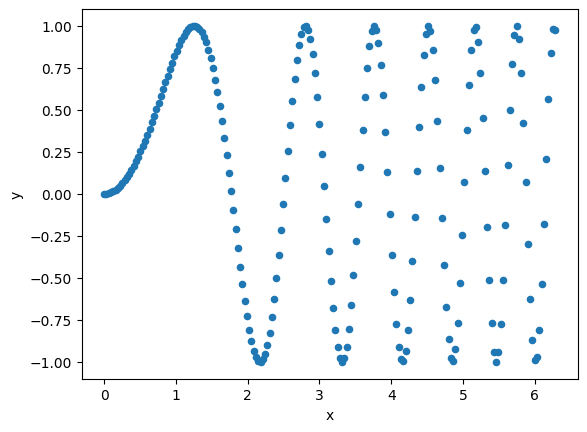

In [18]:
# when using pandas
df = pd.DataFrame({"x": x, "y": y})
ax2 = df.plot.scatter("x", "y")

In [21]:
type(ax1), type(ax2)

(matplotlib.axes._axes.Axes, matplotlib.axes._axes.Axes)

## Subplots
Subplots are plots within a plot, which allows to place multiple plots in the same image.
The [official documentation](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html) is very good, but you can find other nice tutorials online too.

You can generate multiple subplots using the `plt.subplots` function.

If you want to use `pandas` to generate a particular subplot, you can pass the a `matplotlib.Axes` to the `ax` argument of the plotting method.

array([[<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >]], dtype=object)

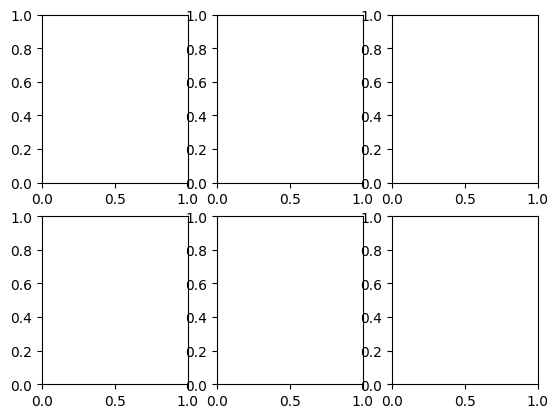

In [31]:
fig, axes = plt.subplots(2,3)

axes

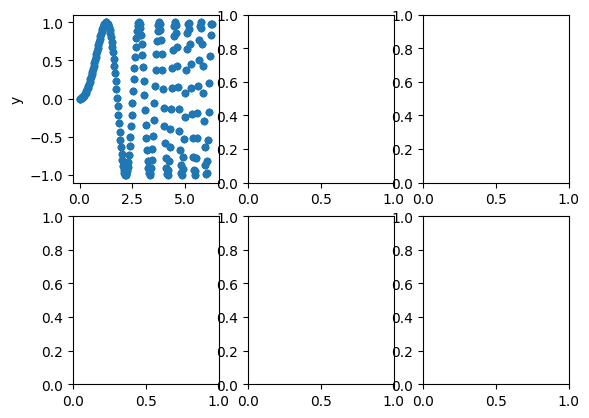

In [34]:
df.plot.scatter("x", "y", ax=axes[0][0])

display(fig)

# Colorbar

When plotting a column as the color of the data, pandas will add a colorbar by default.

You can achieve it yourself, by using pure matplotlib. [Here are some examples](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/colorbar_placement.html) from the official docs.

you can also change the color scale, [here are some builtin ones](https://matplotlib.org/stable/tutorials/colors/colormaps.html)

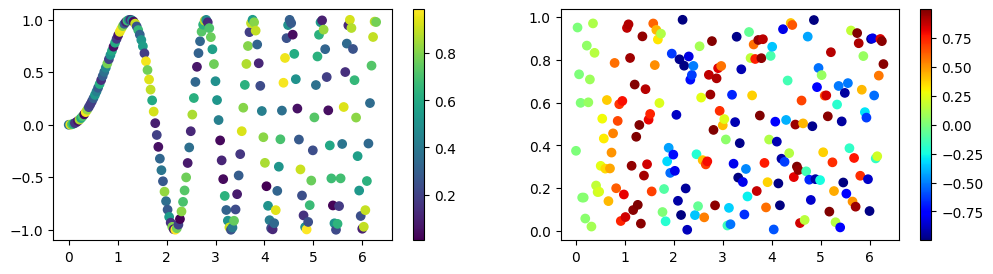

In [46]:
np.random.seed(42) # Fixing random state for reproducibility
z = np.random.random(x.shape)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,3))

ax1, ax2 = axes

p1 = ax1.scatter(x,y, c=z)
fig.colorbar(p1, ax=ax1)

p2 = ax2.scatter(x,z, c=y, cmap="jet")
fig.colorbar(p2, ax=ax2)

**Note**: Subplots returns either a single Axes object, a sequence of Axes objects or a sequence of sequences of Axes objects depending on how many rows and cols are requested!

In [53]:
fig, axes_0d = plt.subplots()
print("single subplot", axes_0d, "\n")
plt.close()

fig, axes_1d = plt.subplots(1,3)
print("1 by 3", axes_1d, "\n")
plt.close()

fig, axes_2d = plt.subplots(2,3)
print("2 by 3", axes_2d, "\n")
plt.close()

single subplot Axes(0.125,0.11;0.775x0.77) 

1 by 3 [<Axes: > <Axes: > <Axes: >] 

2 by 3 [[<Axes: > <Axes: > <Axes: >]
 [<Axes: > <Axes: > <Axes: >]] 




You can flatten the sequence of sequences by using the `.ravel` method.

In [54]:
axes_2d.ravel()

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
      dtype=object)

## Working with NaNs

,A,B,C
0,0.374540,0.380826,0.642032
1,0.950714,1.077996,0.084140
2,0.731994,0.794865,0.161629
3,0.598658,0.700373,0.898554
4,0.156019,0.337532,0.606429
...,...,...,...
95,0.493796,0.563638,0.522243
96,0.522733,0.667924,0.769994
97,0.427541,0.606963,0.215821
98,0.025419,0.202836,0.622890


<Axes: xlabel='A', ylabel='B'>

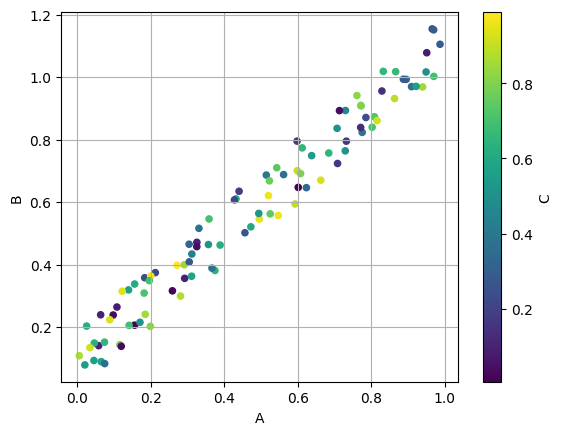

In [76]:
np.random.seed(42) # Fixing random state for reproducibility

a = np.random.random(100)
b = a + np.random.random(100)*0.2
c = np.random.random(100)

df = pd.DataFrame({"A": a, "B": b, "C": c})

display(df)
df.plot.scatter("A", "B", c="C", grid=True)

In [85]:
df_with_nulls = df.copy()
df_with_nulls.loc[:50, "C"] = np.nan

display(df_with_nulls)

,A,B,C
0,0.374540,0.380826,NaN
1,0.950714,1.077996,NaN
2,0.731994,0.794865,NaN
3,0.598658,0.700373,NaN
4,0.156019,0.337532,NaN
...,...,...,...
95,0.493796,0.563638,0.522243
96,0.522733,0.667924,0.769994
97,0.427541,0.606963,0.215821
98,0.025419,0.202836,0.622890


<Axes: title={'center': 'with NaN'}, xlabel='A', ylabel='B'>

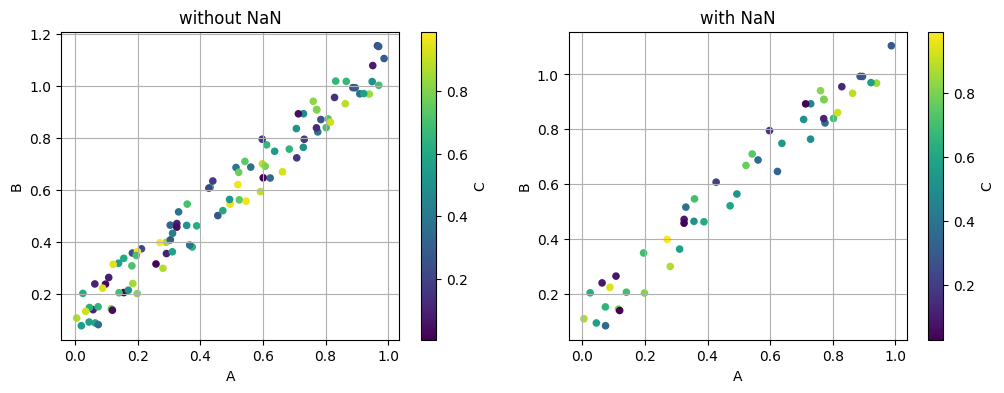

In [86]:
fig, axes = plt.subplots(1,2, figsize=(12,4))
df.plot.scatter("A", "B", c="C", grid=True, ax=axes[0], title="without NaN")
df_with_nulls.plot.scatter("A", "B", c="C", grid=True, ax=axes[1], title="with NaN")

## filling with a custom value

<Axes: title={'center': 'with filled NaN'}, xlabel='A', ylabel='B'>

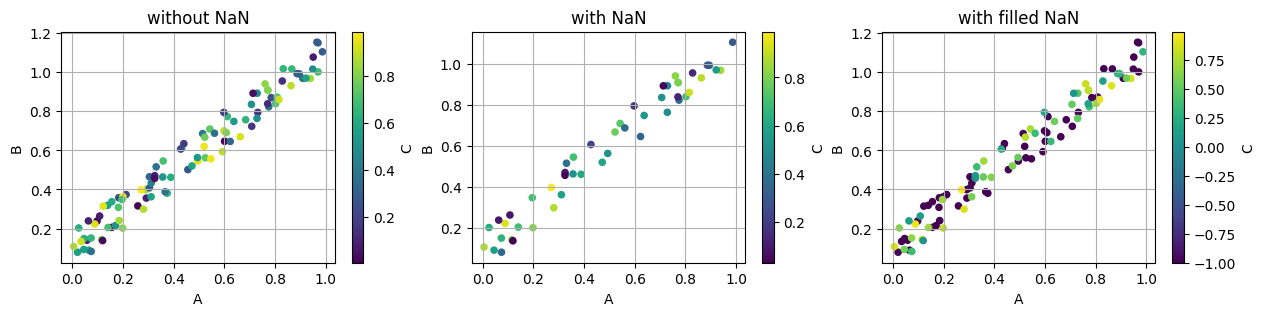

In [88]:
df_filled = df_with_nulls.copy()
df_filled["C"] = df_filled["C"].fillna(-1)

fig, axes = plt.subplots(1,3, figsize=(15,3))
df.plot.scatter("A", "B", c="C", grid=True, ax=axes[0], title="without NaN")
df_with_nulls.plot.scatter("A", "B", c="C", grid=True, ax=axes[1], title="with NaN")
df_filled.plot.scatter("A", "B", c="C", grid=True, ax=axes[2], title="with filled NaN")

### plot missing separately not to skew colorscale

<Axes: xlabel='A', ylabel='B'>

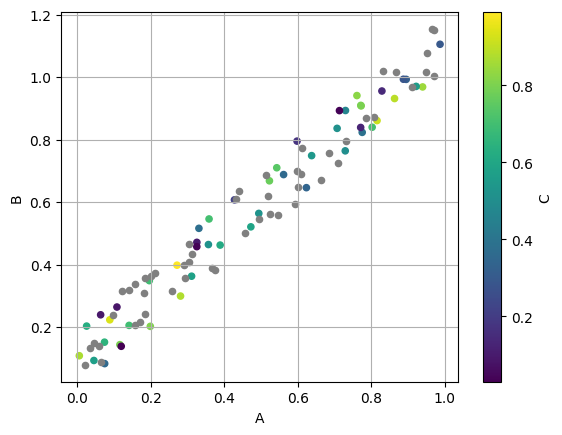

In [94]:
fig, ax = plt.subplots()
df_with_nulls.plot.scatter("A", "B", c="C", ax=ax)
has_null_c = pd.isnull(df_with_nulls["C"])
df_with_nulls[has_null_c].plot.scatter("A", "B", grid=True, color="gray", ax=ax)